# CPTR 512 Programming in Data Analytics

Harvey Alférez, PhD

## Unit 8. K-means in Python

In [1]:
#From: https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html?highlight=kmeans#sklearn.cluster.KMeans

from sklearn.cluster import KMeans
import numpy as np
X = np.array([[1, 2], [1, 4], [1, 0],
               [10, 2], [10, 4], [10, 0]])
kmeans = KMeans(n_clusters=2, random_state=0).fit(X)
print(kmeans.labels_)
print(kmeans.predict([[0, 0], [12, 3]]))
print(kmeans.cluster_centers_)

[1 1 1 0 0 0]
[1 0]
[[10.  2.]
 [ 1.  2.]]


### Another example

[[3 5]
 [1 4]
 [1 5]
 [2 6]
 [1 5]
 [6 8]
 [6 6]
 [6 7]
 [5 6]
 [6 7]
 [7 1]
 [8 2]
 [9 1]
 [8 2]
 [9 3]
 [9 2]
 [8 3]]


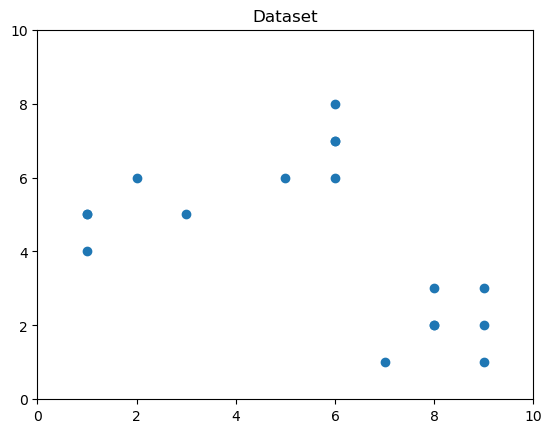

In [8]:
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
import numpy as np
import matplotlib.pyplot as plt

# Creating the data
x1 = np.array([3, 1, 1, 2, 1, 6, 6, 6, 5, 6, 7, 8, 9, 8, 9, 9, 8])
x2 = np.array([5, 4, 5, 6, 5, 8, 6, 7, 6, 7, 1, 2, 1, 2, 3, 2, 3])
X = np.array(list(zip(x1, x2))).reshape(len(x1), 2)
print(X)
  
# Visualizing the data
plt.plot()
plt.xlim([0, 10])
plt.ylim([0, 10])
plt.title('Dataset')
plt.scatter(x1, x2)
plt.show()

From the above visualization, we can see that the optimal number of clusters should be around 3. But visualizing the data alone cannot always give the right answer. Hence we now define the following:

- Distortion: It is calculated as the average of the squared distances from the cluster centers of the respective clusters. Typically, the Euclidean distance metric is used. 
    Distortion = 1/n * Σ(distance(point, centroid)^2)
- Inertia: It is the sum of squared distances of samples to their closest cluster center.
    Inertia = Σ(distance(point, centroid)^2)

The main difference in K-means is in the scope of calculation. 

- Distortion measures the average squared distance for individual data points within their clusters.
- Inertia measures the overall sum of squared distances for all data points across all clusters. 

Both metrics are used to assess the quality of the clustering solution, with lower values indicating better and more compact clusters. Distortion can be useful when you want to understand the average quality of clustering for individual data points, while inertia provides a global measure of clustering quality.

We iterate the values of k from 1 to 9 and calculate the values of distortions for each value of k and calculate the distortion and inertia for each value of k in the given range.

In [19]:
distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
K = range(1, 10)
  
for k in K:
    # Building and fitting the model
    kmeanModel = KMeans(n_clusters=k).fit(X)
    kmeanModel.fit(X)
  
    #This formula calculates the average of the minimum Euclidean distances from each data point 
    #to its assigned cluster centroid.
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_,
                                        'euclidean'), axis=1)) / X.shape[0]) #X.shape[0] contains the number of samples  
    inertias.append(kmeanModel.inertia_)
  
    mapping1[k] = sum(np.min(cdist(X, kmeanModel.cluster_centers_,
                                   'euclidean'), axis=1)) / X.shape[0]
    mapping2[k] = kmeanModel.inertia_

In [12]:
for key, val in mapping1.items():
    print(f'{key} : {val}')

1 : 3.4577032384495707
2 : 1.7687413573405673
3 : 0.8819889697423957
4 : 0.7587138847606585
5 : 0.6872918402957646
6 : 0.6006691410317333
7 : 0.5093717077076824
8 : 0.42618267462691206
9 : 0.3311048924975034


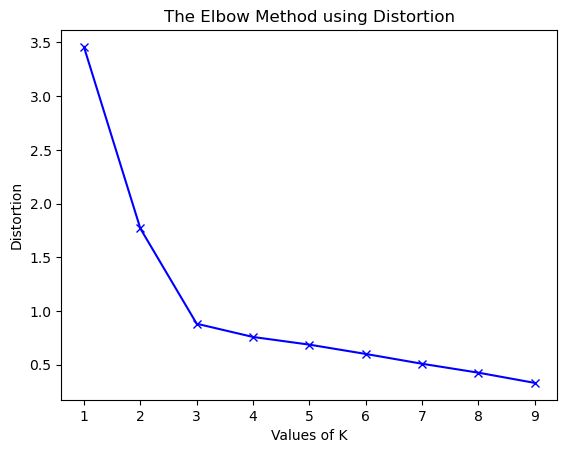

In [11]:
plt.plot(K, distortions, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion')
plt.show()

In [13]:
for key, val in mapping2.items():
    print(f'{key} : {val}')

1 : 217.64705882352942
2 : 68.42857142857142
3 : 16.228571428571428
4 : 12.695238095238096
5 : 9.6
6 : 7.333333333333333
7 : 5.083333333333333
8 : 4.083333333333333
9 : 3.166666666666667


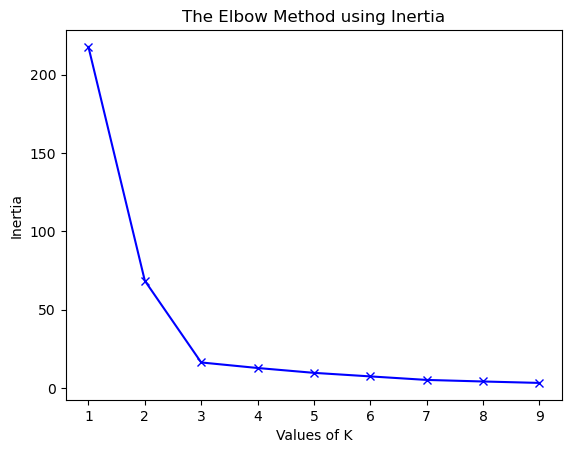

In [14]:
plt.plot(K, inertias, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Inertia')
plt.title('The Elbow Method using Inertia')
plt.show()

To determine the optimal number of clusters, we have to select the value of k at the “elbow” i.e., the point after which the inertia start decreasing in a linear fashion. Thus for the given data, we conclude that the optimal number of clusters for the data is 3.

### Another example

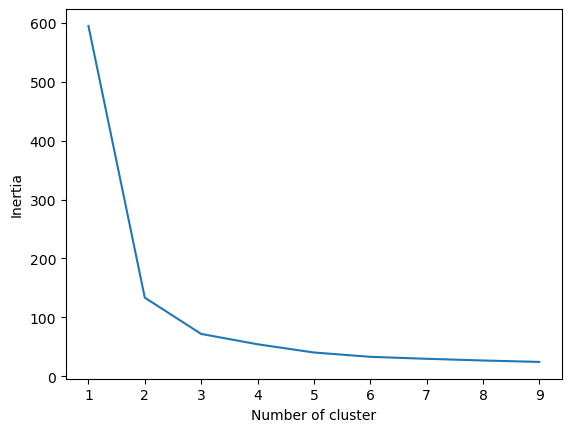

In [16]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris['feature_names'])

data = X[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)']]

sse = {}
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(data)
    data["clusters"] = kmeans.labels_
    #print(data["clusters"])
    sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("Inertia")
plt.show()

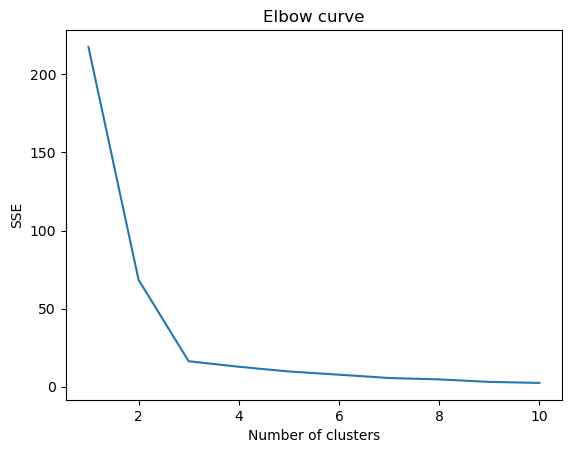

In [7]:
from sklearn.cluster import KMeans
from sklearn import metrics
import numpy as np
import matplotlib.pyplot as plt

# Creating the data
x1 = np.array([3, 1, 1, 2, 1, 6, 6, 6, 5, 6, 7, 8, 9, 8, 9, 9, 8])
x2 = np.array([5, 4, 5, 6, 5, 8, 6, 7, 6, 7, 1, 2, 1, 2, 3, 2, 3])
X = np.array(list(zip(x1, x2))).reshape(len(x1), 2)

# Finding the optimal number of clusters using the elbow rule
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init='random', n_init=10, max_iter=300)
    kmeans.fit(X)
    sse.append(kmeans.inertia_)

# Plotting the elbow curve
plt.plot(range(1, 11), sse)
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow curve')
plt.show()

### Another example

In [6]:
!pip install yellowbrick

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 282.6/282.6 kB 3.1 MB/s eta 0:00:0000:0100:01


In [5]:
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

iris = load_iris()

print(iris['feature_names'])
print(iris['target_names']) 

X = iris['data']

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
['setosa' 'versicolor' 'virginica']


findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif


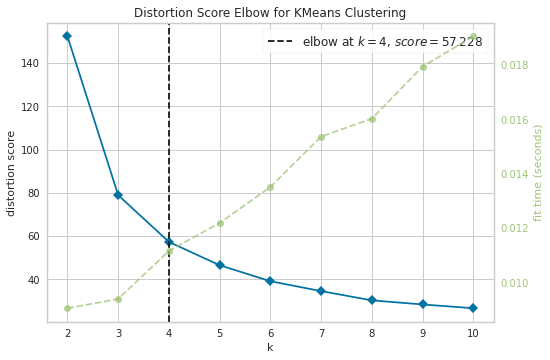

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [7]:
model = KMeans(random_state=42)

elb_visualizer = KElbowVisualizer(model, k=(2,11))
elb_visualizer.fit(X)    
elb_visualizer.show()  

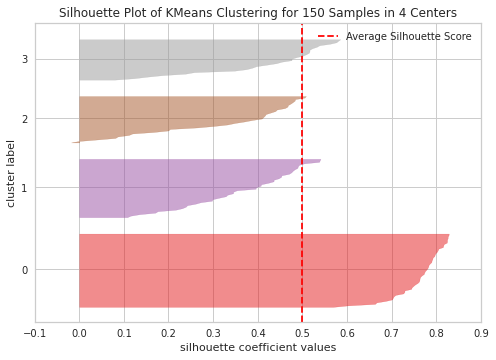

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 150 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [11]:
model_4clust = KMeans(n_clusters = 4, random_state=42)

sil_visualizer = SilhouetteVisualizer(model_4clust)
sil_visualizer.fit(X)    
sil_visualizer.show()

#Compute the mean Silhouette Coefficient of all samples.
#https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html

#The Silhouette Coefficient is calculated using the mean intra-cluster distance (a) 
#and the mean nearest-cluster distance (b) for each sample. 
#The Silhouette Coefficient for a sample is (b-a) / max(b-a)

The code displays a Silhouette Plot of KMeans Clustering for 150 Samples in 4 Centers. To analyze this clusters, we need to look at the value of the silhouette coefficient (or score), its best value is closer to 1. The average value we have is 0.5, marked by the vertical line, and not so good.

We also need to look at the distribution between clusters - a good plot has similar sizes of clustered areas or well-distributted points. In this graph, there are 3 smaller clusters (number 3, 2, 1) and one larger cluster (number 0), which isn't the result we were expecting.

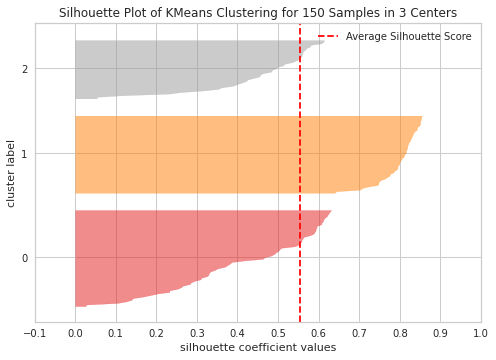

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 150 Samples in 3 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [9]:
#Let's repeat the same plot for 3 clusters to see what happens:

model_3clust = KMeans(n_clusters = 3, random_state=42)

sil_visualizer = SilhouetteVisualizer(model_3clust)
sil_visualizer.fit(X)    
sil_visualizer.show()

By changing the number of clusters, the silhouette score got 0.05 higher and the clusters are more balanced. 

This is an example how combining and comparing different metrics, vizualizing data, and experimenting with different values of clusters is important to lead the result in the right direction. And also, how having a library that facilitates that analysis can help in that process!

Another example by Scikit Learn: https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html

Another mechanism: The Calinski Harabasz Score or Variance Ratio is the ratio between within-cluster dispersion and between-cluster dispersion. Extra credit!